In this project, I've obtained the dataset from Kaggle, which is available at the following link: https://www.kaggle.com/datasets/srolka/ecommerce-customers.

#**Import Package**

In [ ]:
# Load library/package
from google.colab import drive

import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn import linear_model


# **LOAD DATASET**

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Project/SOSMED DIGITAL/Data Scientist/Regression/Ecommerce Customers.csv')

In [ ]:
#Show 10 data
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


# **EDA**

In [ ]:
df.info()

In [ ]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


# **DATA PRE-PROCESSING**

## Missing value

In [ ]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [ ]:
df[df.isna().any(axis=1)] #another approach

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


In [ ]:
#If the data contain missing value you can use this script to handle that issues
#for example if we have the Nan or missing value at Avg. Session Length we can use the missing value inputation
# or removing the missing value. We will be talk about it more in the next section
df['Avg. Session Length'] = df['Avg. Session Length'].fillna(np.mean(df['Avg. Session Length']))

## Duplicate Data

In [ ]:
duplicate = df[df.duplicated()]
duplicate

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent


From the duplicate check results, no duplicate data was found. Duplicate data can be handled using the drop function as shown below: df.drop_duplicates(inplace=True)

## Handling Outlier

<Axes: ylabel='Avg. Session Length'>

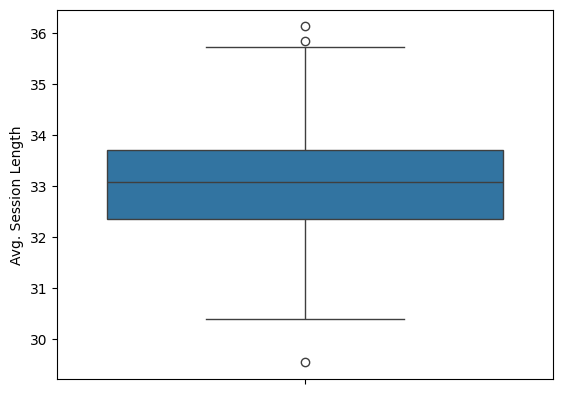

In [ ]:
sns.boxplot(df['Avg. Session Length'])

<Axes: ylabel='Time on App'>

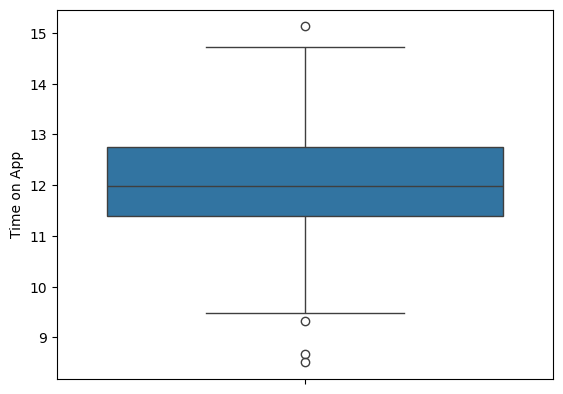

In [ ]:
sns.boxplot(df['Time on App'])

<Axes: ylabel='Length of Membership'>

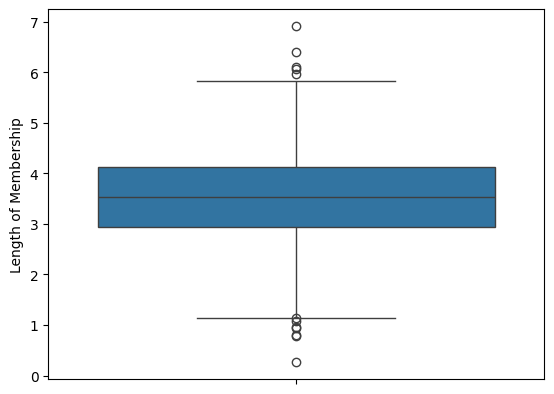

In [ ]:
sns.boxplot(df['Length of Membership'])

<Axes: ylabel='Time on Website'>

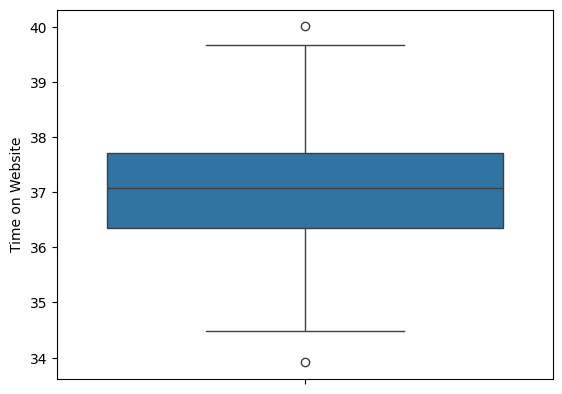

In [ ]:
sns.boxplot(df['Time on Website'])

In [ ]:
def outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

In [ ]:
columns_to_check = ['Avg. Session Length', 'Time on App', 'Length of Membership']

for column in columns_to_check:
    upper, lower = outliers(df, column)
    df = df[(df[column] > lower) & (df[column] < upper)]

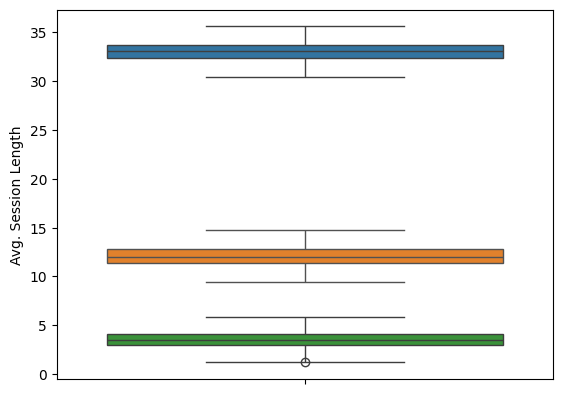

In [ ]:
#Check again the boxplot
for column in columns_to_check:
  sns.boxplot(df[column])

# **FEATURE ENGINEERING**

<ipython-input-18-1792d5207e3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')


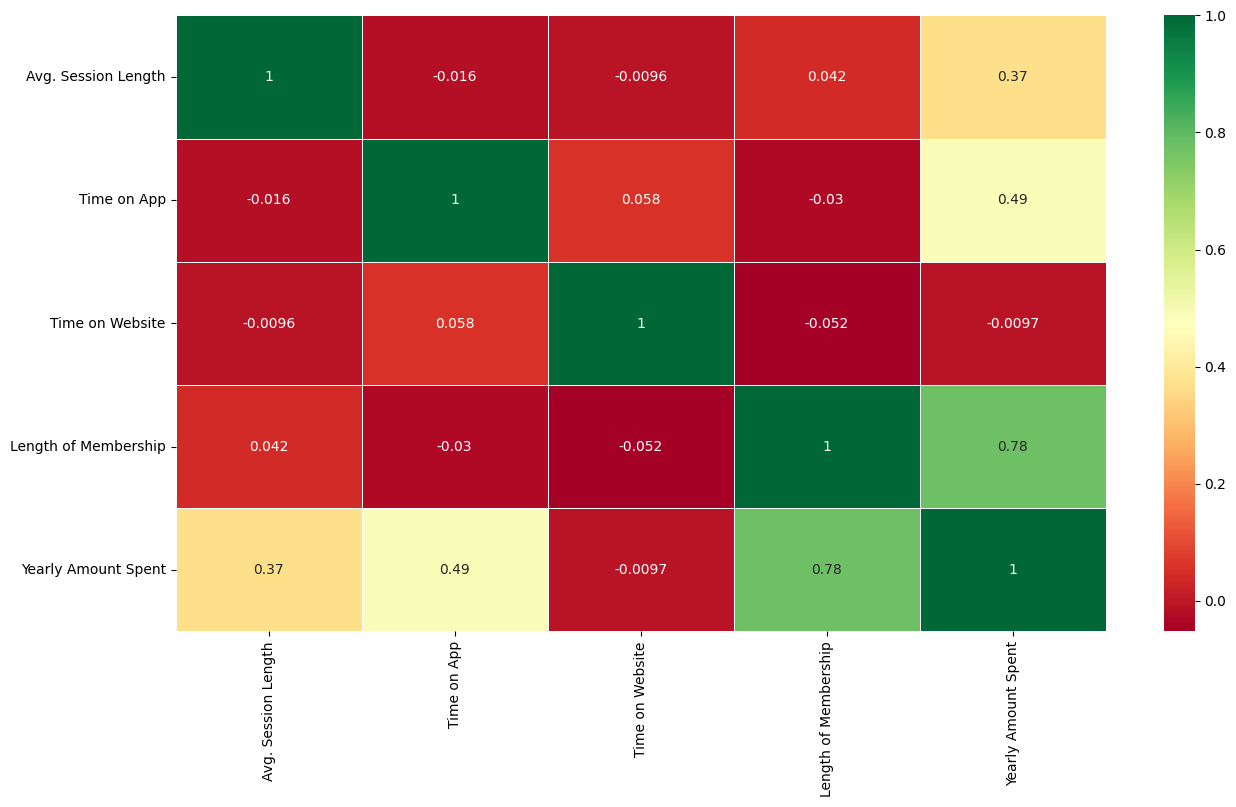

In [ ]:
#Check Correlation
sns.heatmap(df.corr(),linewidths=.5,annot=True,cmap='RdYlGn')
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

In [ ]:
# Check the order of correlation from lowest to highest.
correlation = df.corr()["Yearly Amount Spent"].sort_values()
correlation

<ipython-input-19-759e3654627a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()["Yearly Amount Spent"].sort_values()


Time on Website        -0.009691
Avg. Session Length     0.367971
Time on App             0.488407
Length of Membership    0.775063
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

In [ ]:
#Pick all features that have positive correlation.
df = df[['Avg. Session Length', 'Time on App','Length of Membership','Yearly Amount Spent']]

# **Assumption**

##Test for Normality.

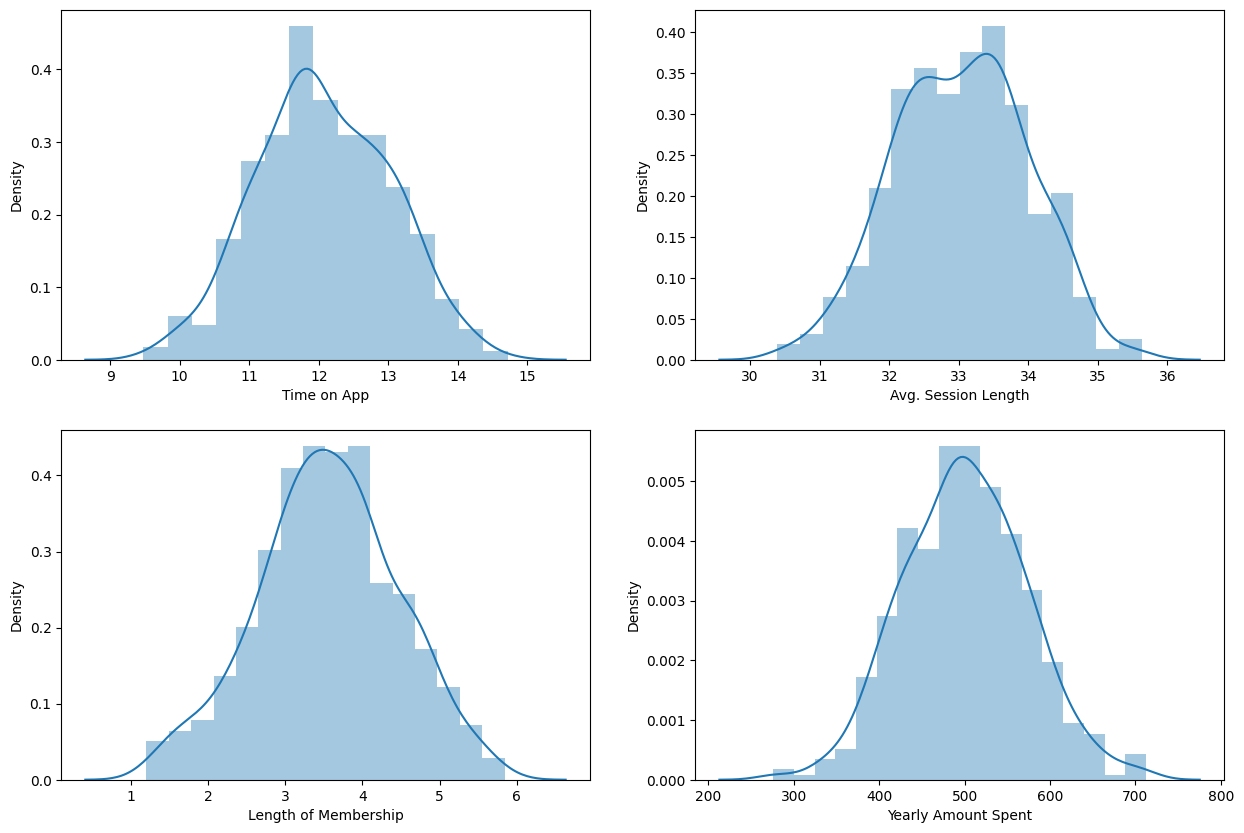

In [ ]:
warnings.filterwarnings('ignore')
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.distplot(df["Time on App"], ax=axes[0, 0])
sns.distplot(df["Avg. Session Length"], ax=axes[0, 1])
sns.distplot(df["Length of Membership"], ax=axes[1, 0])
sns.distplot(df["Yearly Amount Spent"], ax=axes[1, 1])
plt.show()

Normality test using Shapiro-Wilk:<br>

H0: The data follows a normal distribution.<br>
H1: The data does not follow a normal distribution.

In [ ]:
from scipy.stats import shapiro
column = df.columns

for i in column:
  stat, p = shapiro(df[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  alpha = 0.05
  if p > alpha:
    print('Failed to reject H0, {} follows a normal distribution'.format(i))
  else:
    print('Reject H0, {} does not follow a normal distribution'.format(i))

Statistics=0.996, p=0.292
Failed to reject H0, Avg. Session Length follows a normal distribution
Statistics=0.996, p=0.316
Failed to reject H0, Time on App follows a normal distribution
Statistics=0.995, p=0.166
Failed to reject H0, Length of Membership follows a normal distribution
Statistics=0.998, p=0.917
Failed to reject H0, Yearly Amount Spent follows a normal distribution


## Test for Linearity

Testing linearity examines the linear relationship between variables, implying that any change in one variable is accompanied by a proportional change in another variable.

<Axes: xlabel='Avg. Session Length', ylabel='Yearly Amount Spent'>

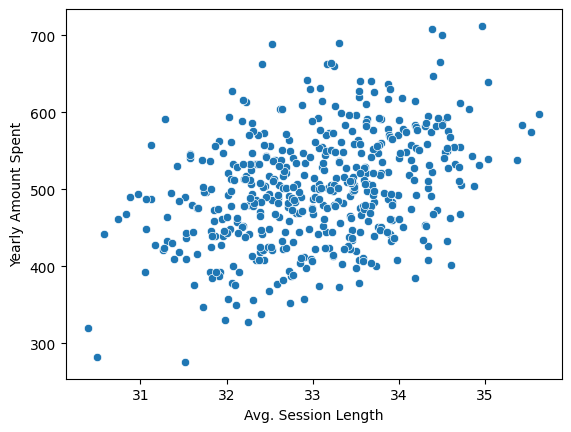

In [ ]:
sns.scatterplot(data=df, x='Avg. Session Length', y='Yearly Amount Spent')

<Axes: xlabel='Time on App', ylabel='Yearly Amount Spent'>

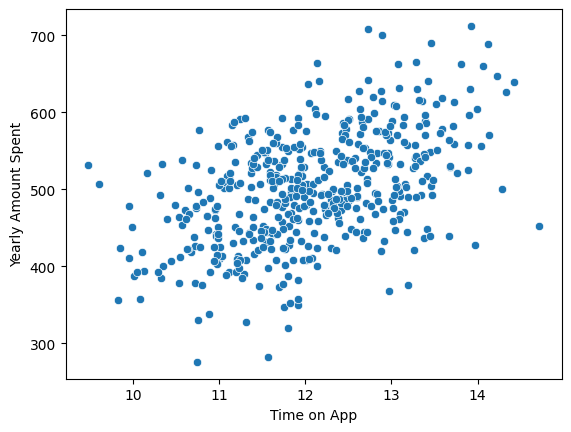

In [ ]:
sns.scatterplot(data=df, x='Time on App', y='Yearly Amount Spent')

<Axes: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

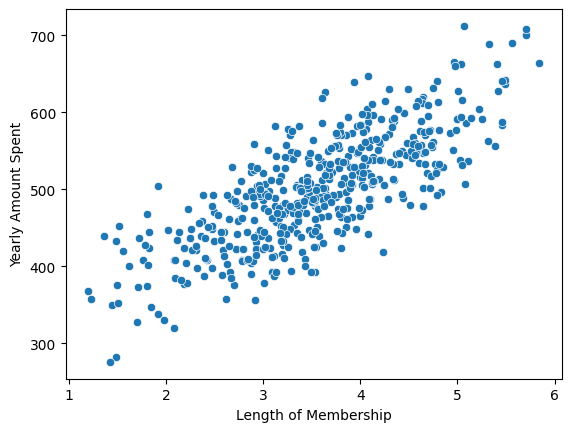

In [ ]:
sns.scatterplot(data=df, x='Length of Membership', y='Yearly Amount Spent')

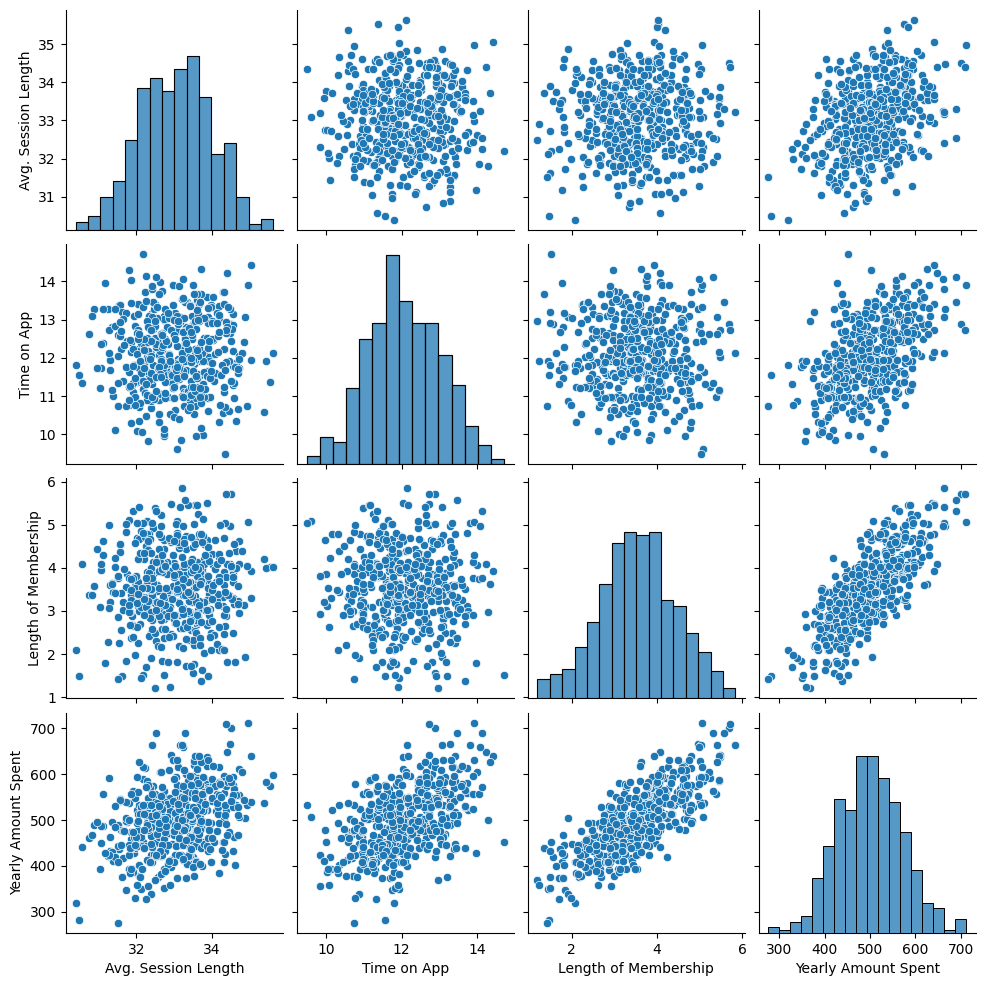

In [ ]:
sns.pairplot(df)

The above plot shows the data dispersion (blue dots) clustering around the linear line, indicating a linear relationship between dependent and independent variable.

## Test for Multicollinearity


The test for multicollinearity is conducted to examine the presence of high correlation among the independent variables in a multiple linear regression model

<Axes: >

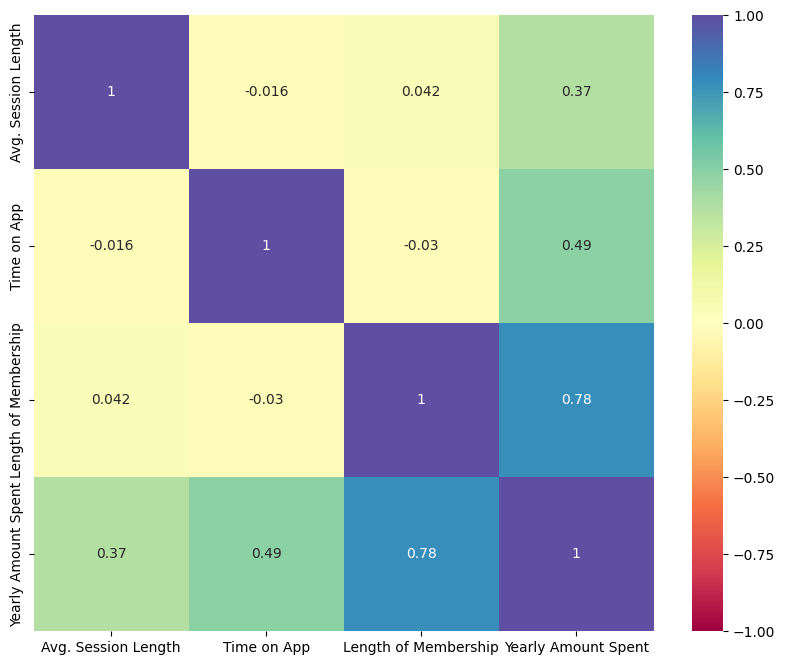

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

Obtained:

The correlation value between Time on App and Length of Membership is -0.027.
The correlation value between Time on App and Avg. Session Length is -0.00095.
The correlation value between Avg. Session Length and Length of Membership is 0.043.

<br><br>The correlation values obtained among the independent variables are relatively small, thus satisfying the assumption.

#Modeling

##Scaling


Scaling is used to change the scale of data. The use of scaling can help reduce the gap between columns in the data. This process does not alter the distribution within the data; it only rescales the data

In [ ]:
# Scale data
scaler = StandardScaler()
dfscaling = scaler.fit_transform(df)
dfscaling = pd.DataFrame(dfscaling, columns=df.columns)
dfscaling.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent
0,1.528183,0.613565,0.586762,1.213989
1,-1.162462,-1.001532,-0.978804,-1.508782
2,-0.037807,-0.770874,0.610956,-0.182595
3,1.327550,1.722750,-0.475398,1.129158
4,0.307297,0.759321,0.988131,1.373326


Note :
In terms of range, scaling may not be necessary, but for the purpose of learning, we will still apply scaling

## **Train Test Split**

In [ ]:
X = dfscaling[['Avg. Session Length', 'Time on App','Length of Membership']]
y = dfscaling['Yearly Amount Spent']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model_lr.predict(X_test)

In [ ]:
list_columns = []

for i in df.columns:
  if i != "Yearly Amount Spent":
    list_columns.append(i)

In [ ]:
df_lrmod = pd.DataFrame(X_test, columns=list_columns)
df_lrmod["Yearly Amount Spent actual"] = y_test
df_lrmod["Yearly Amount Spent prediction"] = y_pred
df_lrmod.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent actual,Yearly Amount Spent prediction
15,-0.954081,-0.349305,-0.457791,-0.595711,-0.874839
124,1.750108,-1.479595,-0.367149,-0.448295,-0.439000
141,0.928891,-0.163838,-0.707312,-0.564920,-0.309911
263,-1.275128,-0.879229,0.226156,-0.754685,-0.734076
170,0.040461,0.262793,-0.119351,0.005920,0.051785


# Residual Assumptions

In regression analysis, residuals refer to the differences between the observed values (actual data) and the values predicted by the regression model. Residuals represent the unexplained or leftover variation not accounted for by the model. Mathematically, residuals can be calculated as the difference between the actual values (y) and the predicted values (ŷ)

In [ ]:
df_lrmod["residual"] = y_test - y_pred

In [ ]:
df_lrmod.head()

,Avg. Session Length,Time on App,Length of Membership,Yearly Amount Spent actual,Yearly Amount Spent prediction,residual
15,-0.954081,-0.349305,-0.457791,-0.595711,-0.874839,0.279128
124,1.750108,-1.479595,-0.367149,-0.448295,-0.439000,-0.009295
141,0.928891,-0.163838,-0.707312,-0.564920,-0.309911,-0.255010
263,-1.275128,-0.879229,0.226156,-0.754685,-0.734076,-0.020609
170,0.040461,0.262793,-0.119351,0.005920,0.051785,-0.045865


## Normal Distribution Residual Assumption

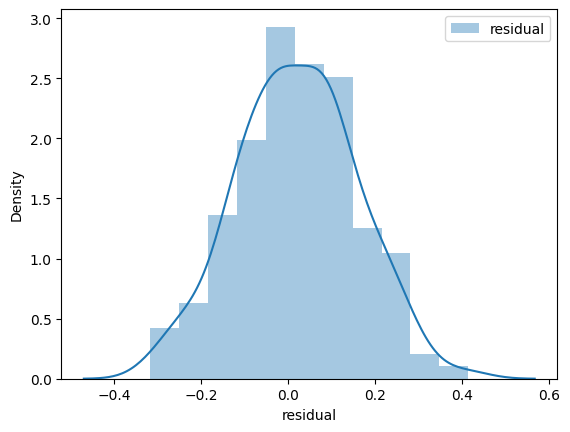

In [ ]:
# Visualizing the distribution of residuals.
sns.distplot(df_lrmod["residual"], label="residual")
plt.legend()
plt.show()

In [ ]:
# Test with  Shapiro-Wilk
from scipy.stats import shapiro
stat_e, pval_e = shapiro(df_lrmod["residual"])

print(f"The p-value for testing the normality of residual data = {pval_e}")

alpha = 0.05
if p > alpha:
  print('Failed to reject H0; residuals are normally distributed.')
else:
  print('Reject H0; residuals are not normally distributed')

The p-value for testing the normality of residual data = 0.9741256237030029
Failed to reject H0; residuals are normally distributed.


## Autocorrelation assumption

The Durbin-Watson test is a statistical test used to detect the presence of autocorrelation in the residuals of a regression analysis. Autocorrelation occurs when there is a correlation between the current observation and one or more previous observations in a time series or in the residuals of a regression model.<br><br>

Objective:<br>
Detect autocorrelation in regression residuals.

Range of Values:<br>
DW statistic ranges from 0 to 4.<br>
2 indicates no autocorrelation.<br>
Close to 0 suggests positive autocorrelation.<br>
Close to 4 suggests negative autocorrelation.

Interpretation:<br>
Close to 2: No significant autocorrelation.<br>
Significantly less than 2: Positive autocorrelation.<br>
Significantly greater than 2: Negative autocorrelation.

Test Procedure:<br>
Compares squared differences between consecutive residuals to total squared residuals.

Decision Rule:<br>
Critical values: 1.5 (suggestive of positive autocorrelation) and 2.5 (suggestive of negative autocorrelation).

Use in Regression Analysis:<br>
Autocorrelation violates the assumption of independent errors.<br>
Detection helps improve model efficiency and inference.

In [ ]:
# Perform Durbin-Watson test
dw_statistic = statsmodels.stats.stattools.durbin_watson(df_lrmod["residual"])

# Output Durbin-Watson statistic
print(f'Durbin-Watson Statistic: {dw_statistic}')

# Interpret the Durbin-Watson statistic
if dw_statistic < 1.5:
    print('Positive autocorrelation may be present.')
elif dw_statistic > 2.5:
    print('Negative autocorrelation may be present.')
else:
    print('No significant autocorrelation detected.')

Durbin-Watson Statistic: 1.85519453643751
No significant autocorrelation detected.


## Homoscedasticity test

Homoscedasticity test is conducted to examine whether there is variance heterogeneity among residuals from one observation to another.

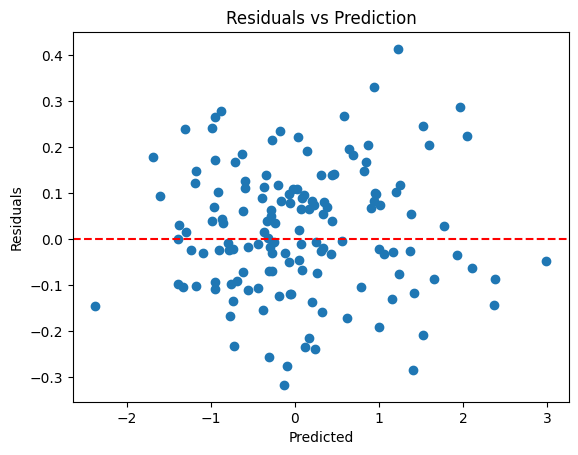

In [ ]:
# Assuming df_lrmod is your DataFrame with columns 'Yearly Amount Spent prediction' and 'residual'
asm_homosk = plt.scatter(df_lrmod['Yearly Amount Spent prediction'], df_lrmod["residual"])
plt.xlabel('Predicted')
plt.ylabel('Residuals')

# Adding a red line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--', label='Zero Residuals')

# Adding a title to the plot
asm_homosk = plt.title('Residuals vs Prediction')

# Display the plot
plt.show()

From the generated graph above, it is observed that the data cluster around a central point, indicating homoscedasticity is satisfied. The residuals appear to be scattered somewhat randomly around the zero line. However, there seems to be a slight trend of the residuals increasing as the predicted values increase. This could indicate that the model might be underestimating the actual values for higher predicted values

# Model Evaluation

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print('Mean Squared error :', mse)

Mean Squared error : 0.01916720875624116


In [ ]:
rmse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print('Root mean Squared Error :', rmse)

Root mean Squared Error : 0.13844568883226793


In [ ]:
mase = mean_absolute_error(y_test,y_pred)
print('Mean absolute error :', mase)

Mean absolute error : 0.11163888631012446


In [ ]:
r2 = r2_score(y_test,y_pred)
print('R_squared :', r2)

R_squared : 0.9792823573182148


The linear regression modeling yields an R-square of approximately 97%, indicating that the variable concentration of Independent variable can explain 97% of the variation in Dependent variable

# Model Validation

cross_val_score is a function provided by the scikit-learn library in Python for performing cross-validation. Cross-validation is a technique used to assess the performance and generalization ability of a machine learning model. Instead of using a single train-test split, cross-validation involves splitting the dataset into multiple subsets (folds) and training the model on different combinations of these folds.

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Perform cross-validation and get scores
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error scores to positive RMSE
rmse_scores = np.sqrt(-scores)

# Print individual fold scores and overall performance
for i, rmse in enumerate(rmse_scores):
    print(f'Fold {i+1} RMSE: {rmse:.2f}')

print(f'Average RMSE across all folds: {np.mean(rmse_scores):.2f}')

Fold 1 RMSE: 0.14
Fold 2 RMSE: 0.14
Fold 3 RMSE: 0.13
Fold 4 RMSE: 0.14
Fold 5 RMSE: 0.15
Average RMSE across all folds: 0.14


cross_val_score is used to perform cross-validation on a linear regression model (linear_model.LinearRegression()) using the provided k-fold splitting (cv=kf). The scoring metric used is negative mean squared error.

An instance of LinearRegression is created.
cross_val_score is used to perform 5-fold cross-validation with negative mean squared error as the scoring metric.
Negative mean squared error scores are converted to positive root mean squared error (RMSE) scores.
Individual fold RMSE scores and the average RMSE across all folds are printed.
Adjust the cv parameter in cross_val_score based on the desired number of folds for cross-validation. This script gives you an overview of the performance of your linear regression model across different folds.

#LOAD AND PREDICT NEW DATA

In [ ]:
x = np.array([200, 1250,3]).reshape(1,-1)
y_pred = model_lr.predict(x)
y_pred

array([718.4610887])